### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [5]:
def replace_low_freq(df, threshold=100, replacement='other'):
    s = df.stack()
    c = s.value_counts()
    m = pd.Series(replacement, c.index[c <= threshold])
    return s.replace(m).unstack()


In [6]:
# Importing dataset
leads = pd.read_csv("Leads.csv", index_col = 'Lead Number')
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
660681,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [7]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 36)

In [8]:
#remove spaces from column names
columns = []
for col in leads.columns:
    columns.append(col.title().replace(" ", ""))
    
leads.columns = columns
# print(leads.columns)
leads.head()

,ProspectId,LeadOrigin,LeadSource,DoNotEmail,DoNotCall,Converted,Totalvisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,LastActivity,Country,Specialization,HowDidYouHearAboutXEducation,WhatIsYourCurrentOccupation,WhatMattersMostToYouInChoosingACourse,Search,Magazine,NewspaperArticle,XEducationForums,Newspaper,DigitalAdvertisement,ThroughRecommendations,ReceiveMoreUpdatesAboutOurCourses,Tags,LeadQuality,UpdateMeOnSupplyChainContent,GetUpdatesOnDmContent,LeadProfile,City,AsymmetriqueActivityIndex,AsymmetriqueProfileIndex,AsymmetriqueActivityScore,AsymmetriqueProfileScore,IAgreeToPayTheAmountThroughCheque,AFreeCopyOfMasteringTheInterview,LastNotableActivity
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
660681,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# replace selects with nan
leads.replace('Select', np.NAN, inplace=True)

In [10]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

ProspectId                                0.00
LeadOrigin                                0.00
LeadSource                                0.39
DoNotEmail                                0.00
DoNotCall                                 0.00
Converted                                 0.00
Totalvisits                               1.48
TotalTimeSpentOnWebsite                   0.00
PageViewsPerVisit                         1.48
LastActivity                              1.11
Country                                  26.63
Specialization                           36.58
HowDidYouHearAboutXEducation             78.46
WhatIsYourCurrentOccupation              29.11
WhatMattersMostToYouInChoosingACourse    29.32
Search                                    0.00
Magazine                                  0.00
NewspaperArticle                          0.00
XEducationForums                          0.00
Newspaper                                 0.00
DigitalAdvertisement                      0.00
ThroughRecomm

In [11]:
leads.LeadQuality.value_counts(normalize=True)

Might be             0.348759
Not Sure             0.244131
High in Relevance    0.142410
Worst                0.134362
Low in Relevance     0.130338
Name: LeadQuality, dtype: float64

#### removing columns with high null values and index numbers 

In [12]:
leadsData = leads.drop(['LeadProfile', 'HowDidYouHearAboutXEducation', 'ProspectId', 'LeadQuality'], axis=1)

In [13]:
# Let's check the dimensions of the dataframe
leadsData.shape

(9240, 32)

In [14]:
# Let's see the type of each column
leadsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 32 columns):
LeadOrigin                               9240 non-null object
LeadSource                               9204 non-null object
DoNotEmail                               9240 non-null object
DoNotCall                                9240 non-null object
Converted                                9240 non-null int64
Totalvisits                              9103 non-null float64
TotalTimeSpentOnWebsite                  9240 non-null int64
PageViewsPerVisit                        9103 non-null float64
LastActivity                             9137 non-null object
Country                                  6779 non-null object
Specialization                           5860 non-null object
WhatIsYourCurrentOccupation              6550 non-null object
WhatMattersMostToYouInChoosingACourse    6531 non-null object
Search                                   9240 non-null object
Magazine          

In [15]:
# let's look at the statistical aspects of the dataframe
leadsData.describe()

,Converted,Totalvisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,AsymmetriqueActivityScore,AsymmetriqueProfileScore
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [16]:
# Checking the percentage of missing values
round(100*(leadsData.isnull().sum()/len(leadsData.index)), 2)

LeadOrigin                                0.00
LeadSource                                0.39
DoNotEmail                                0.00
DoNotCall                                 0.00
Converted                                 0.00
Totalvisits                               1.48
TotalTimeSpentOnWebsite                   0.00
PageViewsPerVisit                         1.48
LastActivity                              1.11
Country                                  26.63
Specialization                           36.58
WhatIsYourCurrentOccupation              29.11
WhatMattersMostToYouInChoosingACourse    29.32
Search                                    0.00
Magazine                                  0.00
NewspaperArticle                          0.00
XEducationForums                          0.00
Newspaper                                 0.00
DigitalAdvertisement                      0.00
ThroughRecommendations                    0.00
ReceiveMoreUpdatesAboutOurCourses         0.00
Tags         

In [17]:
leadsData.Specialization.fillna('NotSpecified', inplace=True)
leadsData.Specialization.value_counts(normalize=True)*100

NotSpecified                         36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

#### Specialization has 36.58% null values. However, we are not dropping this column. We are assigning the value to 'NotSpecified'. The specialization can be an important field since company may want to pitch relavant courses to indiviuals according to their domain. 

In [18]:
leadsData.Tags.value_counts(dropna=False, normalize=True)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [19]:
# drop tags column as it has high null percentage and is created by sales team.
leadsData.drop('Tags', axis=1, inplace=True)
leadsData.head()

,LeadOrigin,LeadSource,DoNotEmail,DoNotCall,Converted,Totalvisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,LastActivity,Country,Specialization,WhatIsYourCurrentOccupation,WhatMattersMostToYouInChoosingACourse,Search,Magazine,NewspaperArticle,XEducationForums,Newspaper,DigitalAdvertisement,ThroughRecommendations,ReceiveMoreUpdatesAboutOurCourses,UpdateMeOnSupplyChainContent,GetUpdatesOnDmContent,City,AsymmetriqueActivityIndex,AsymmetriqueProfileIndex,AsymmetriqueActivityScore,AsymmetriqueProfileScore,IAgreeToPayTheAmountThroughCheque,AFreeCopyOfMasteringTheInterview,LastNotableActivity
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NotSpecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NotSpecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NotSpecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [20]:
leadsData.AsymmetriqueProfileIndex.value_counts(dropna=False, normalize=True)

NaN          0.456494
02.Medium    0.301732
01.High      0.238420
03.Low       0.003355
Name: AsymmetriqueProfileIndex, dtype: float64

In [21]:
leadsData.AsymmetriqueActivityIndex.value_counts(dropna=False, normalize=True)

NaN          0.456494
02.Medium    0.415476
01.High      0.088853
03.Low       0.039177
Name: AsymmetriqueActivityIndex, dtype: float64

#### drop custom calculated indexes as these have high null values and can be derived from other parameters

In [22]:
leadsData.drop(['AsymmetriqueActivityIndex', 'AsymmetriqueActivityScore', 'AsymmetriqueProfileIndex', 'AsymmetriqueProfileScore'], axis=1, inplace=True)

In [23]:
leadsData.City.value_counts(dropna=False, normalize=True)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [24]:
## impute the null values with a new category. 
leadsData.City.fillna('NotSpecified',inplace=True )

cityCount = leadsData.groupby('City')['Converted'].value_counts().reset_index(name='count')
cityCount

,City,Converted,count
0,Mumbai,0,1913
1,Mumbai,1,1309
2,NotSpecified,0,2412
3,NotSpecified,1,1257
4,Other Cities,0,410
5,Other Cities,1,276
6,Other Cities of Maharashtra,0,256
7,Other Cities of Maharashtra,1,201
8,Other Metro Cities,0,225
9,Other Metro Cities,1,155


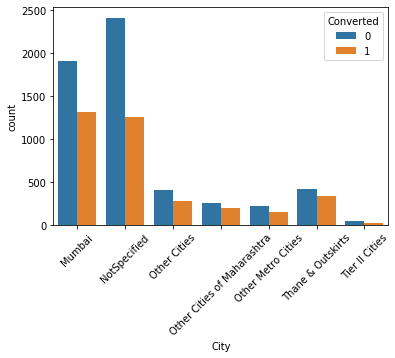

In [25]:
plt.xticks(rotation=45)
sns.barplot(x='City', y='count', hue='Converted', data = cityCount)

In [26]:
cityCount.loc[cityCount.City=='NotSpecified', 'count']/cityCount.loc[cityCount.City=='NotSpecified', 'count'].sum()

2    0.6574
3    0.3426
Name: count, dtype: float64

#### We are using the 'NotSpecified' category as the conversion rate and lead count is high

In [27]:
leadsData.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Germany                    4
Nigeria                    4
South Africa               4
Kuwait                     4
Canada                     4
Sweden                     3
Philippines                2
Netherlands                2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Belgium                    2
China                      2
Ghana                      2
Italy                      2
Malaysia                   1
Russia                     1
Indonesia                  1
Tanzania                   1
Kenya                      1
Switzerland                1
Denmark       

In [28]:
leadsData.loc[(~(leadsData.Country=='India') & leadsData.Country.notnull()), 'Country'] ='Others'
100* leadsData.Country.value_counts(dropna=False, normalize=True)

India     70.259740
NaN       26.634199
Others     3.106061
Name: Country, dtype: float64

In [29]:
leadsData.Country.fillna('NotSpecified',inplace=True )

countryCount = leadsData.groupby('Country')['Converted'].value_counts().reset_index(name='count')
countryCount

,Country,Converted,count
0,India,0,4091
1,India,1,2401
2,NotSpecified,0,1385
3,NotSpecified,1,1076
4,Others,0,203
5,Others,1,84


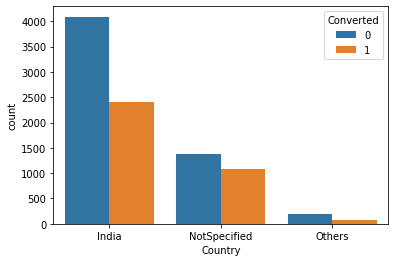

In [30]:
sns.barplot(x='Country', y='count', hue='Converted', data = countryCount)

In [31]:
countryCount.loc[countryCount.Country=='NotSpecified', 'count']/countryCount.loc[countryCount.Country=='NotSpecified', 'count'].sum()

2    0.562779
3    0.437221
Name: count, dtype: float64

#### We see that over 36% people chose not specify the country. However conversion rate is high for these people. We can use this as third category

In [32]:
leadsData.WhatIsYourCurrentOccupation.value_counts(normalize=True,dropna=False )*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: WhatIsYourCurrentOccupation, dtype: float64

In [33]:
leadsData.WhatIsYourCurrentOccupation.fillna('NotSpecified',inplace=True )

occupationCount = leadsData.groupby('WhatIsYourCurrentOccupation')['Converted'].value_counts().reset_index(name='count')
occupationCount

,WhatIsYourCurrentOccupation,Converted,count
0,Businessman,1,5
1,Businessman,0,3
2,Housewife,1,10
3,NotSpecified,0,2320
4,NotSpecified,1,370
5,Other,1,10
6,Other,0,6
7,Student,0,132
8,Student,1,78
9,Unemployed,0,3159


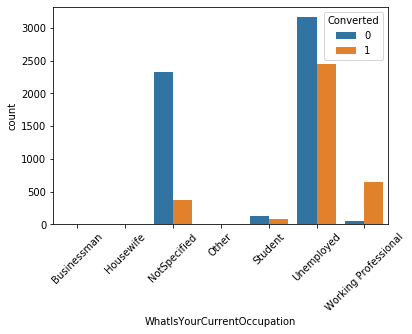

In [34]:
plt.xticks(rotation=45)
sns.barplot(x='WhatIsYourCurrentOccupation', y='count', hue='Converted', data = occupationCount)

In [35]:
occupationCount.loc[occupationCount.WhatIsYourCurrentOccupation=='NotSpecified', 'count']/occupationCount.loc[occupationCount.WhatIsYourCurrentOccupation=='NotSpecified', 'count'].sum()

3    0.862454
4    0.137546
Name: count, dtype: float64

In [36]:
occupationCount.loc[occupationCount.WhatIsYourCurrentOccupation=='Unemployed', 'count']/occupationCount.loc[occupationCount.WhatIsYourCurrentOccupation=='Unemployed', 'count'].sum()

9     0.564107
10    0.435893
Name: count, dtype: float64

#### Conversion rate for NotSpecified and Unemployed Is high. While working professionals have lowest conversion rate. 

In [37]:
leadsData.WhatMattersMostToYouInChoosingACourse.value_counts(normalize=True, dropna=False)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: WhatMattersMostToYouInChoosingACourse, dtype: float64

#### This column is highly skewed. and has high null values. We can drop this 

In [38]:
leadsData.drop('WhatMattersMostToYouInChoosingACourse', axis=1,inplace=True)

In [39]:
leadsData.LastActivity.value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: LastActivity, dtype: int64

In [40]:
# shrink categories with less than 100 values to 'others'
cols = ['LastActivity']
leadsData = replace_low_freq(leadsData[cols], 101).join(leadsData.drop(cols, 1))
leadsData.LastActivity.value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
other                         205
Form Submitted on Website     116
Name: LastActivity, dtype: int64

In [41]:
# lets review LeadSource column
leadsData.LeadSource.value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             462
Welingak Website      129
Referral Sites        125
Facebook               39
NaN                    34
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
testone                 1
youtubechannel          1
blog                    1
Name: LeadSource, dtype: int64

In [42]:
# shrink categories with less than 100 values to 'others'
cols = ['LeadSource']
leadsData = replace_low_freq(leadsData[cols]).join(leadsData.drop(cols, 1))
leadsData.LeadSource.value_counts(dropna=False)

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            462
Welingak Website     129
Referral Sites       125
other                 67
Name: LeadSource, dtype: int64

In [43]:
leadsData.Totalvisits.describe(percentiles=[0, .25, .5, .75, .9, .95, .98, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
0%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
98%        13.000000
99%        17.000000
max       251.000000
Name: Totalvisits, dtype: float64

In [44]:
# we can compute null with the median value. mean and median are not very far apart. and number of visits have to be an iteger.
leadsData.loc[leadsData.Totalvisits.isnull(), 'Totalvisits'] = leadsData.Totalvisits.median()

In [45]:
leadsData.PageViewsPerVisit.describe(percentiles=[0, .25, .5, .75, .9, .95, .98, .99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
0%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
98%         8.000000
99%         9.000000
max        55.000000
Name: PageViewsPerVisit, dtype: float64

In [46]:
# we can compute null with the median value. mean and median are not very far apart. and number of visits have to be an iteger.
leadsData.loc[leadsData.PageViewsPerVisit.isnull(), 'PageViewsPerVisit'] = leadsData.PageViewsPerVisit.mean()

In [47]:
# Checking the percentage of missing values
round(100*(leadsData.isnull().sum()/len(leadsData.index)), 2)

LeadSource                           0.0
LastActivity                         0.0
LeadOrigin                           0.0
DoNotEmail                           0.0
DoNotCall                            0.0
Converted                            0.0
Totalvisits                          0.0
TotalTimeSpentOnWebsite              0.0
PageViewsPerVisit                    0.0
Country                              0.0
Specialization                       0.0
WhatIsYourCurrentOccupation          0.0
Search                               0.0
Magazine                             0.0
NewspaperArticle                     0.0
XEducationForums                     0.0
Newspaper                            0.0
DigitalAdvertisement                 0.0
ThroughRecommendations               0.0
ReceiveMoreUpdatesAboutOurCourses    0.0
UpdateMeOnSupplyChainContent         0.0
GetUpdatesOnDmContent                0.0
City                                 0.0
IAgreeToPayTheAmountThroughCheque    0.0
AFreeCopyOfMaste

### Step 3: Exploratory Data Analysis

#### Univariate 

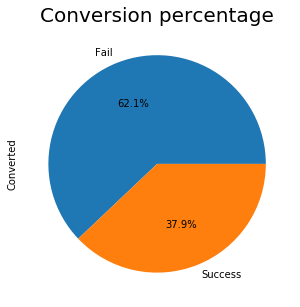

In [48]:
plt.figure(figsize=[8,5])
leadsData.Converted.value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=['Fail', 'Success'])
plt.title('Conversion percentage', fontsize=20)
plt.show()

#### From above plot, we can observe that,
- About 60% of leads have gone cold, while 40% leads have been converted into oppotunities.

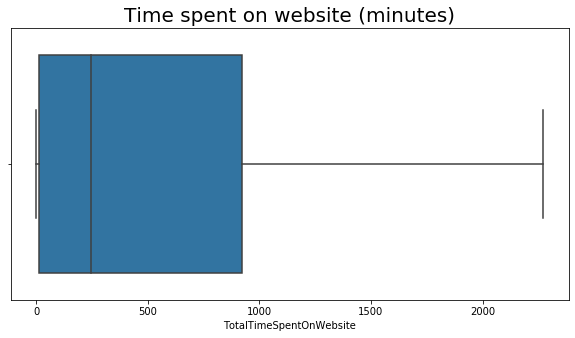

In [49]:
# time spent by users on website
plt.figure(figsize=[10,5])
sns.boxplot(leadsData.TotalTimeSpentOnWebsite)
plt.title('Time spent on website (minutes)', fontsize=20)
plt.show()

In [50]:
leadsData.TotalTimeSpentOnWebsite.mean()

483.7739206854883

#### From the above plot, we can observe that,
- Maximum of leads have spent very less time on the website, close to around 50 minutes
- Average time spent on wesite is 8 hours and 11 minutes
- A rise in time spent after 700 minutes, indicates that some leads have been spending a lot of time on the website, maybe looking at resources and offers. It may be the case that these leads have a higher tendency to convert. We can test this assumption later.

In [51]:
#funtion to check for outliers
def checkOutliers(data):
    Q1 = data.quantile(0.05)
    Q3 = data.quantile(0.95)
    IQR = Q3 - Q1
    lower_lim = Q1 - (1.5*IQR)
    upper_lim = Q3 + (1.5*IQR)
    
    output = (data < lower_lim) | (data > upper_lim)
    data['IsOutlier'] = output.sum(axis=1)>0
    outliers = data[data['IsOutlier'] == True]
    return outliers

In [52]:
# Converting nan values in PageViewsPerVisit to 0
leadsData.PageViewsPerVisit.fillna(0, inplace=True)

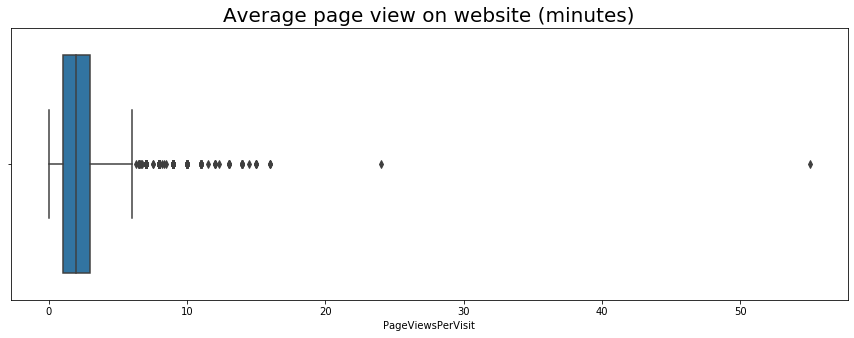

In [53]:
#Average number of pages on the website viewed during the visits.

plt.figure(figsize=[15,5])
sns.boxplot(leadsData.PageViewsPerVisit)
plt.title('Average page view on website (minutes)', fontsize=20)
plt.show()

In [54]:
leadsData.PageViewsPerVisit.mean()

2.3701509808243335

#### From the above plot, we can observe that,
- Average time spent per page by all leads is very less, close to 2.32 minutes.
- High mean time on website but low page views per visit indicates that the website is attracting a lot of people but people are not finding the content on the website interesting.

In [55]:
# checking for outliers in PageViewPerVisit
outliers = checkOutliers(leadsData[['PageViewsPerVisit']])
outliers

,PageViewsPerVisit,IsOutlier
Lead Number,,
659241,16.0,True
638668,55.0,True
610357,16.0,True
607748,16.0,True
597579,24.0,True


In [56]:
## Since there are only 5 outliers, we can choose to drop them
leadsData = leadsData[leadsData['PageViewsPerVisit'] < 16]

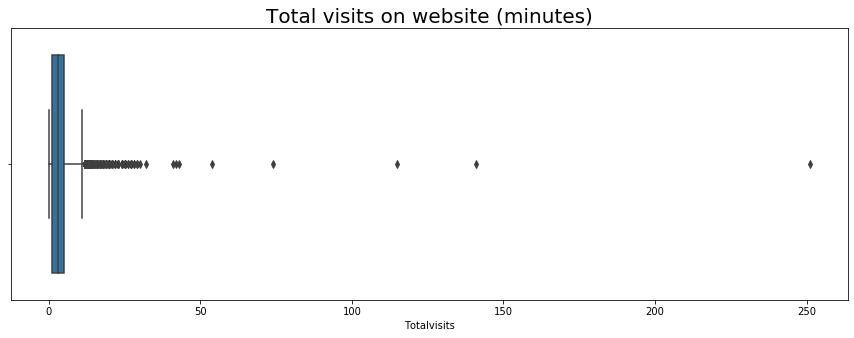

In [57]:
# investigate The total number of visits made by the customer on the website.

plt.figure(figsize=[15,5])
sns.boxplot(leadsData.Totalvisits)
plt.title('Total visits on website (minutes)', fontsize=20)
plt.show()

In [58]:
leadsData.Totalvisits.value_counts(dropna=False)

0.0      2161
2.0      1679
3.0      1335
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       18
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
27.0        5
25.0        5
24.0        4
22.0        3
26.0        2
29.0        2
28.0        2
115.0       1
54.0        1
43.0        1
30.0        1
32.0        1
74.0        1
251.0       1
41.0        1
141.0       1
42.0        1
Name: Totalvisits, dtype: int64

In [59]:
# checking for outliers in PageViewPerVisit
outliers = checkOutliers(leadsData[['Totalvisits']])
outliers.sort_values(by='Totalvisits')

,Totalvisits,IsOutlier
Lead Number,,
611589,26.0,True
598377,26.0,True
583931,27.0,True
634882,27.0,True
589466,27.0,True
591793,27.0,True
592608,27.0,True
616739,28.0,True
594630,28.0,True


In [60]:
#Since Total Visits has a limited number of categories, we can bin this column
catBins = [0, 15, 30, 45, 60, 75, 1000]
binLabels = ['<=15', '15-30', '30-45', '45-60', '60-75', '>=75']
leadsData['VisitBins'] = pd.cut(leadsData.Totalvisits, bins = catBins, labels = binLabels, include_lowest =True)
leadsData.drop('Totalvisits', 1, inplace=True)
leadsData['VisitBins'] = leadsData['VisitBins'].astype('object')
leadsData.VisitBins.value_counts(dropna=False)

<=15     8983
15-30     106
30-45       4
>=75        3
45-60       1
60-75       1
Name: VisitBins, dtype: int64

#### Categorical columns

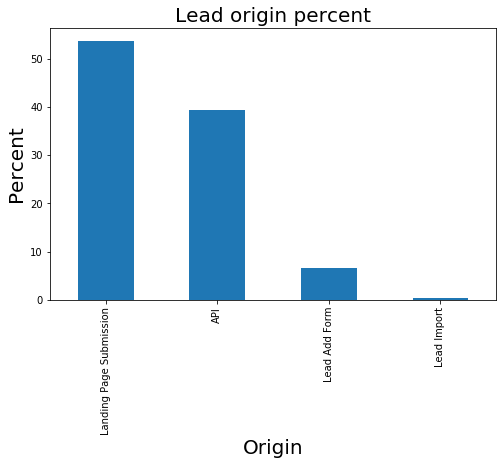

In [61]:
plt.figure(figsize=[8,5])
(leadsData.LeadOrigin.value_counts(normalize=True)*100).plot(kind='bar')
plt.xlabel('Origin', fontsize=20)
plt.ylabel('Percent', fontsize=20)
plt.title('Lead origin percent', fontsize=20)
plt.show()

#### From the above plot, we can observe that,
- The main origin of leads is Landing page submission, around 52%.
- Lead Import and Quick Add form have a very low share in generating leads

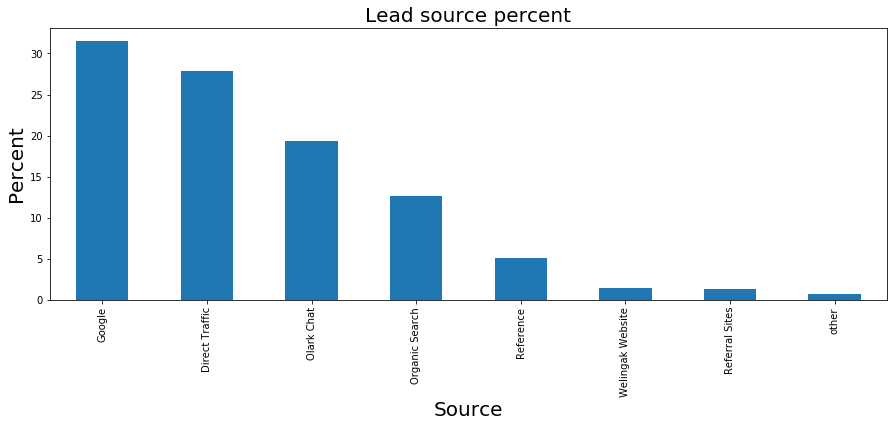

In [62]:
plt.figure(figsize=[15,5])
(leadsData.LeadSource.value_counts(normalize=True)*100).plot(kind='bar')
plt.xlabel('Source', fontsize=20)
plt.ylabel('Percent', fontsize=20)
plt.title('Lead source percent', fontsize=20)
plt.show()

#### From the above plot, we can observe that,
- Google, direct traffic, Olark chat and organic search are main source of leads with a share of 89%
- Other than the 4 mentioned sources, rest all sources have a very less to contribute, which indicates that the marketting of the X Education is not as expected.

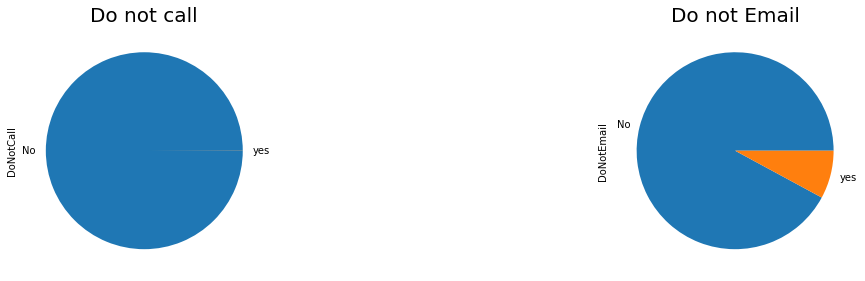

In [63]:
plt.figure(figsize=[15,10])
plt.subplot(131)
leadsData.DoNotCall.value_counts(normalize=True).plot.pie(labels=['No', 'yes'])
plt.title('Do not call', fontsize=20)
plt.subplot(133)
leadsData.DoNotEmail.value_counts(normalize=True).plot.pie(labels=['No', 'yes'])
plt.title('Do not Email', fontsize=20)
plt.show()

#### From the above plot, we can observe that,
- 99.99% of leads have Do not call opton set to No. Clearly this columns is not adding any significant value to our data. Hence, we can choose to drop this column.
- About 7% of leads have opted for Do not email option. This might be beacuse of a lot of marketing emails and users have unsubscribed from mailing list.

In [64]:
leadsData.drop('DoNotCall', axis=1, inplace=True)

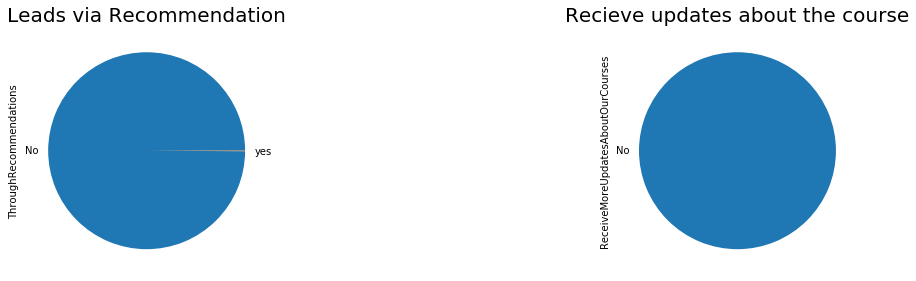

In [65]:
plt.figure(figsize=[15,10])
plt.subplot(131)
leadsData.ThroughRecommendations.value_counts(normalize=True).plot.pie(labels=['No', 'yes'])
plt.title('Leads via Recommendation', fontsize=20)
plt.subplot(133)
leadsData.ReceiveMoreUpdatesAboutOurCourses.value_counts(normalize=True).plot.pie(labels=['No', 'yes'])
plt.title('Recieve updates about the course', fontsize=20)
plt.show()

#### From the above plot, we can observe that,
- Only about 0.001% of leads have come through recommendation. Rest all of the leads have come from different sources. Since this column does not add any significant change to our analysis, we can choose to drop this column
- All the rows have same value for this column hence we can choose to drop this column as well.

In [66]:
leadsData.drop('ThroughRecommendations', axis=1, inplace=True)
leadsData.drop('ReceiveMoreUpdatesAboutOurCourses', axis=1, inplace=True)

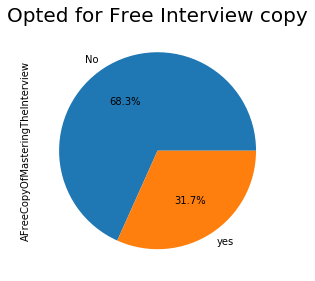

In [67]:
plt.figure(figsize=[15,10])
plt.subplot(131)
leadsData.AFreeCopyOfMasteringTheInterview.value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=['No', 'yes'])
plt.title('Opted for Free Interview copy', fontsize=20)
plt.show()

#### From the above plot, we can observe that,
- About 31.3% of leads have shown positive interest towards the free copy of mastering the interview provided by the educational institute. They might have some good content if a significant amount of leads are opting for it. Also, it can be the case that leads who have shown interest in the free copy are more likely to be converted. We can test this assumption later

#### Bivariate 

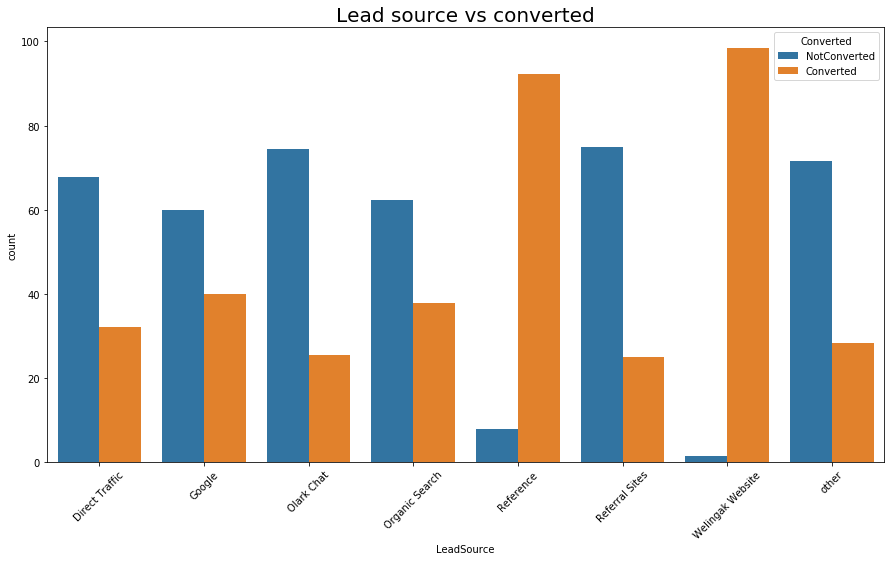

In [68]:
#LeadSource vs Converted
leadSourceCount = (leadsData.groupby('LeadSource')['Converted'].value_counts(normalize=True)*100).reset_index(name='count')
leadSourceCount.Converted =leadSourceCount.Converted.map(lambda x: 'Converted' if x == 1 else 'NotConverted')
leadSourceCount
plt.figure(figsize=[15,8])
sns.barplot(x='LeadSource', y='count', hue='Converted', data = leadSourceCount)
plt.xticks(rotation=45)
plt.title("Lead source vs converted", fontsize=20)
plt.show()

#### From the above plot, we can observe that,
- Out of all the sources of leads, only Reference and Welingak Website have more positive leads than negative leads.
- Direct traffic has almost 33% conversion rate
- Google has about 40% conversion rate.
- Olark Chat has around 25% conversion rate while Organic Search has around 37% conversion rate

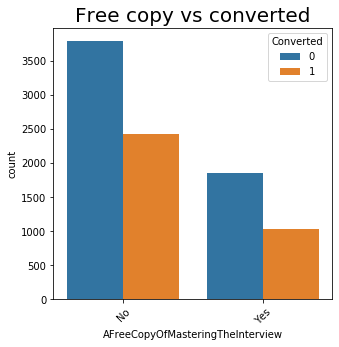

In [69]:
# AFreeCopyOfMasteringTheInterview vs Converted
freeCopyCount = leadsData.groupby('AFreeCopyOfMasteringTheInterview')['Converted'].value_counts().reset_index(name='count')
plt.figure(figsize=[5,5])
sns.barplot(x='AFreeCopyOfMasteringTheInterview', y='count', hue='Converted', data = freeCopyCount)
plt.xticks(rotation=45)
plt.title("Free copy vs converted", fontsize=20)
plt.show()

#### From the above plot, we can observe that,
- Both leads who opted for free copy and those who didn't have similar conversion rate, 39.8% and 35.6% respectively. This contradicts our assumption that leads who opted for free copy might have higher conversion rate.

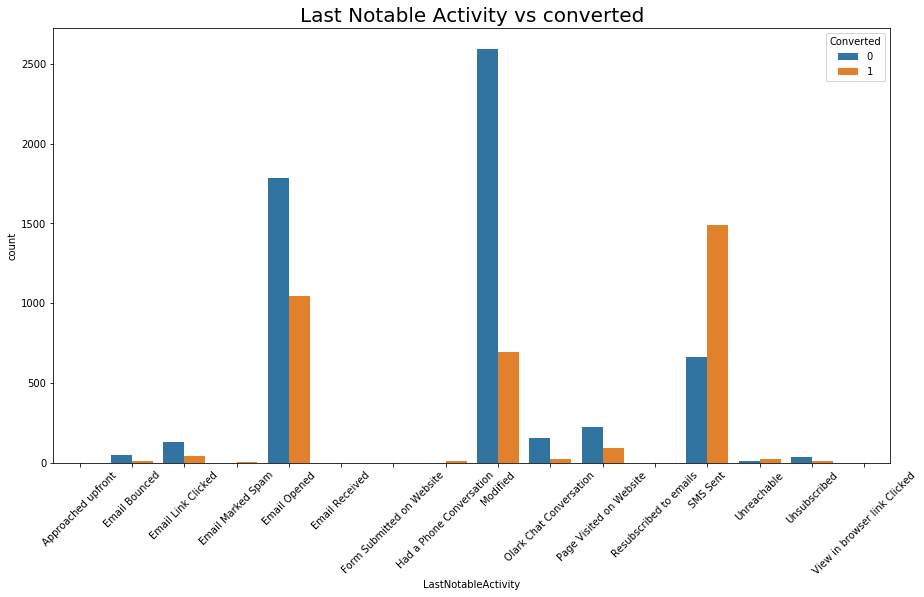

In [70]:
# LastNotableActivity vs Converted
lastActivityCount = leadsData.groupby('LastNotableActivity')['Converted'].value_counts().reset_index(name='count')
plt.figure(figsize=[15,8])
sns.barplot(x='LastNotableActivity', y='count', hue='Converted', data = lastActivityCount)
plt.xticks(rotation=45)
plt.title("Last Notable Activity vs converted", fontsize=20)
plt.show()

#### From the above plot, we can observe that,
- Out of all Last Notable Activity, only SMS sent has positive conversion rate, which makes sense, people who are opting for the course will be completing registeration process with some SMS confirmaton.
- Modified has very high fail rate in converions, approx 78%
- 63% of leads have turned cold after they open the emails.

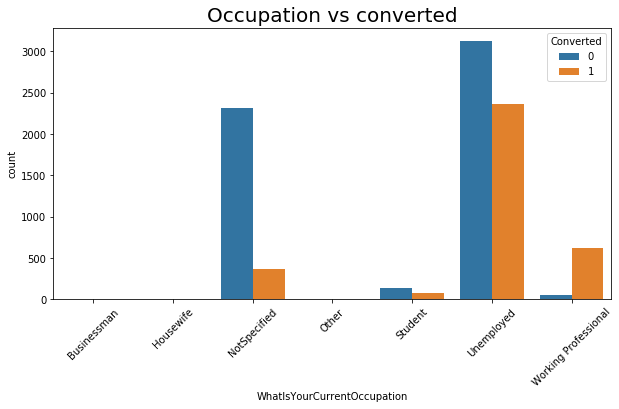

In [71]:
# WhatIsYourCurrentOccupation vs Converted
occupationCount = leadsData.groupby('WhatIsYourCurrentOccupation')['Converted'].value_counts().reset_index(name='count')
plt.figure(figsize=[10,5])
sns.barplot(x='WhatIsYourCurrentOccupation', y='count', hue='Converted', data = occupationCount)
plt.xticks(rotation=45)
plt.title("Occupation vs converted", fontsize=20)
plt.show()

#### From the above plot, we can observe that,
- Out of all occupation, only Working Professional has positive conversion rate, approx 91%.
- Students have a conversion rate of 36%
- Unemployeed leads have highest population in dataset with a conversion rate of 43%.

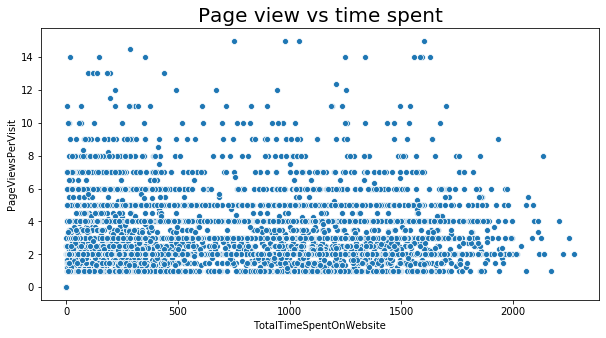

In [72]:
plt.figure(figsize=[10,5])
plt.title("Page view vs time spent", fontsize=20)
sns.scatterplot(x='TotalTimeSpentOnWebsite', y='PageViewsPerVisit', data=leadsData)
plt.show()

#### As the plot above, we can observe that,
- Majority of the leads have a low Total time spent on website and a low page views per visit
- There's a significant chunk of data points having High total time spent on website and low page views per visit. It means that leads know what they are looking for. The website is structured in a way that people are able to easily understand it.

### Miulti-variate analysis

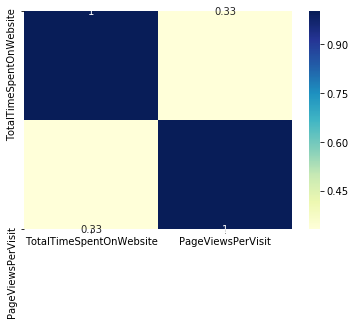

In [73]:
NumericalColumns= ['TotalTimeSpentOnWebsite', 'PageViewsPerVisit']
corr = round(leadsData[NumericalColumns].corr(),3)
sns.heatmap(corr, cmap="YlGnBu", annot=True)

#### From the above plot, we can observe that,
- There are 2 numerical columns in the dataset and that the correlation between them is low

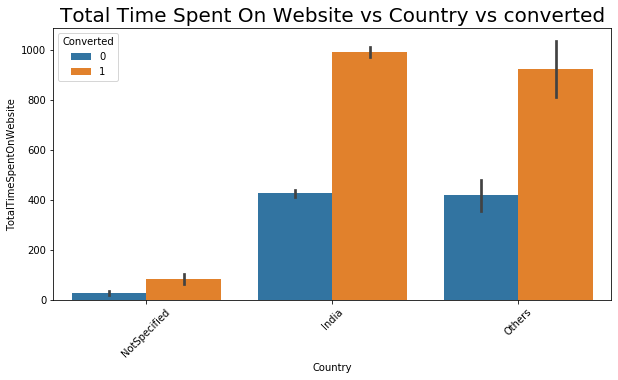

In [74]:
# TotalTimeSpentOnWebsite vs Country vs Converted
plt.figure(figsize=[10,5])
sns.barplot(x='Country', y='TotalTimeSpentOnWebsite', hue='Converted', data = leadsData)
plt.xticks(rotation=45)
plt.title("Total Time Spent On Website vs Country vs converted", fontsize=20)
plt.show()

#### From the above plot, we can observe that,
- The trend of Time spent by various leads on website country wise, seems similar. There is not much difference in lead converison rate on country vs time spent

### Data preparation
let's look at the columns with string data types and map them

In [75]:
leadsData.select_dtypes(include=['object'])

,LeadSource,LastActivity,LeadOrigin,DoNotEmail,Country,Specialization,WhatIsYourCurrentOccupation,Search,Magazine,NewspaperArticle,XEducationForums,Newspaper,DigitalAdvertisement,UpdateMeOnSupplyChainContent,GetUpdatesOnDmContent,City,IAgreeToPayTheAmountThroughCheque,AFreeCopyOfMasteringTheInterview,LastNotableActivity,VisitBins
Lead Number,,,,,,,,,,,,,,,,,,,,
660737,Olark Chat,Page Visited on Website,API,No,NotSpecified,NotSpecified,Unemployed,No,No,No,No,No,No,No,No,NotSpecified,No,No,Modified,<=15
660728,Organic Search,Email Opened,API,No,India,NotSpecified,Unemployed,No,No,No,No,No,No,No,No,NotSpecified,No,No,Email Opened,<=15
660727,Direct Traffic,Email Opened,Landing Page Submission,No,India,Business Administration,Student,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened,<=15
660719,Direct Traffic,other,Landing Page Submission,No,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified,<=15
660681,Google,Converted to Lead,Landing Page Submission,No,India,NotSpecified,Unemployed,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified,<=15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579564,Direct Traffic,other,Landing Page Submission,Yes,Others,IT Projects Management,Unemployed,No,No,No,No,No,No,No,No,Mumbai,No,No,Email Marked Spam,<=15
579546,Direct Traffic,SMS Sent,Landing Page Submission,No,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Mumbai,No,Yes,SMS Sent,<=15
579545,Direct Traffic,SMS Sent,Landing Page Submission,Yes,India,Business Administration,Unemployed,No,No,No,No,No,No,No,No,Mumbai,No,Yes,SMS Sent,<=15


In [76]:
leadsData.AFreeCopyOfMasteringTheInterview.value_counts(dropna=False)

No     6213
Yes    2885
Name: AFreeCopyOfMasteringTheInterview, dtype: int64

In [77]:
leadsData.IAgreeToPayTheAmountThroughCheque.value_counts(dropna=False) 

No    9098
Name: IAgreeToPayTheAmountThroughCheque, dtype: int64

In [78]:
leadsData.DoNotEmail.value_counts(dropna=False) 

No     8380
Yes     718
Name: DoNotEmail, dtype: int64

In [79]:
leadsData.Magazine.value_counts(dropna=False)


No    9098
Name: Magazine, dtype: int64

In [80]:
leadsData.Newspaper.value_counts(dropna=False)
 

No     9097
Yes       1
Name: Newspaper, dtype: int64

In [81]:
leadsData.Search.value_counts(dropna=False)

No     9084
Yes      14
Name: Search, dtype: int64

In [82]:
leadsData.NewspaperArticle.value_counts(dropna=False)

No     9096
Yes       2
Name: NewspaperArticle, dtype: int64

In [83]:
leadsData.DigitalAdvertisement.value_counts(dropna=False)

No     9094
Yes       4
Name: DigitalAdvertisement, dtype: int64

In [84]:
leadsData.UpdateMeOnSupplyChainContent.value_counts(dropna=False) 

No    9098
Name: UpdateMeOnSupplyChainContent, dtype: int64

In [85]:
leadsData.GetUpdatesOnDmContent.value_counts(dropna=False)  

No    9098
Name: GetUpdatesOnDmContent, dtype: int64

In [86]:
leadsData.XEducationForums.value_counts(dropna=False)  

No     9097
Yes       1
Name: XEducationForums, dtype: int64

#### All the above columns are highly skewed. Can be removed. 

In [87]:
leadsData.drop(['IAgreeToPayTheAmountThroughCheque', 'Magazine', 'Search', 'NewspaperArticle', 'DigitalAdvertisement','XEducationForums', 'UpdateMeOnSupplyChainContent', 'GetUpdatesOnDmContent', 'Newspaper'], axis=1, inplace=True)

In [88]:
leadsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9098 entries, 660737 to 579533
Data columns (total 14 columns):
LeadSource                          9098 non-null object
LastActivity                        9098 non-null object
LeadOrigin                          9098 non-null object
DoNotEmail                          9098 non-null object
Converted                           9098 non-null int64
TotalTimeSpentOnWebsite             9098 non-null int64
PageViewsPerVisit                   9098 non-null float64
Country                             9098 non-null object
Specialization                      9098 non-null object
WhatIsYourCurrentOccupation         9098 non-null object
City                                9098 non-null object
AFreeCopyOfMasteringTheInterview    9098 non-null object
LastNotableActivity                 9098 non-null object
VisitBins                           9098 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 1.4+ MB


In [89]:
leadsData.select_dtypes(include=['object'])

,LeadSource,LastActivity,LeadOrigin,DoNotEmail,Country,Specialization,WhatIsYourCurrentOccupation,City,AFreeCopyOfMasteringTheInterview,LastNotableActivity,VisitBins
Lead Number,,,,,,,,,,,
660737,Olark Chat,Page Visited on Website,API,No,NotSpecified,NotSpecified,Unemployed,NotSpecified,No,Modified,<=15
660728,Organic Search,Email Opened,API,No,India,NotSpecified,Unemployed,NotSpecified,No,Email Opened,<=15
660727,Direct Traffic,Email Opened,Landing Page Submission,No,India,Business Administration,Student,Mumbai,Yes,Email Opened,<=15
660719,Direct Traffic,other,Landing Page Submission,No,India,Media and Advertising,Unemployed,Mumbai,No,Modified,<=15
660681,Google,Converted to Lead,Landing Page Submission,No,India,NotSpecified,Unemployed,Mumbai,No,Modified,<=15
...,...,...,...,...,...,...,...,...,...,...,...
579564,Direct Traffic,other,Landing Page Submission,Yes,Others,IT Projects Management,Unemployed,Mumbai,No,Email Marked Spam,<=15
579546,Direct Traffic,SMS Sent,Landing Page Submission,No,India,Media and Advertising,Unemployed,Mumbai,Yes,SMS Sent,<=15
579545,Direct Traffic,SMS Sent,Landing Page Submission,Yes,India,Business Administration,Unemployed,Mumbai,Yes,SMS Sent,<=15


In [90]:
columnsForScaling = list(leadsData.select_dtypes(include=['int64', 'float64']).columns)
columnsForScaling.remove('Converted')
columnsForScaling

['TotalTimeSpentOnWebsite', 'PageViewsPerVisit']

In [91]:
# List of variables to map

varlist =  ['AFreeCopyOfMasteringTheInterview', 'DoNotEmail']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leadsData[varlist] = leadsData[varlist].apply(binary_map)


In [92]:
columnsForDummy = list(leadsData.select_dtypes(include=['object']).columns)
columnsForDummy

['LeadSource',
 'LastActivity',
 'LeadOrigin',
 'Country',
 'Specialization',
 'WhatIsYourCurrentOccupation',
 'City',
 'LastNotableActivity',
 'VisitBins']

In [93]:
leadsData.Specialization.value_counts(dropna=False )

NotSpecified                         3298
Finance Management                    962
Human Resource Management             838
Marketing Management                  824
Operations Management                 499
Business Administration               402
IT Projects Management                364
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                178
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [94]:
# gorup categories with low values to others
cols = ['Specialization']
leadsData = replace_low_freq(leadsData[cols], 300).join(leadsData.drop(cols, 1))
leadsData.Specialization.value_counts(dropna=False)

NotSpecified                         3298
other                                1230
Finance Management                    962
Human Resource Management             838
Marketing Management                  824
Operations Management                 499
Business Administration               402
IT Projects Management                364
Supply Chain Management               346
Banking, Investment And Insurance     335
Name: Specialization, dtype: int64

In [95]:
leadsData.LastNotableActivity.value_counts(dropna=False )

Modified                        3291
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
View in browser link Clicked       1
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
Name: LastNotableActivity, dtype: int64

In [96]:
# gorup categories with low values to others
cols = ['LastNotableActivity']
leadsData = replace_low_freq(leadsData[cols], 100).join(leadsData.drop(cols, 1))
leadsData.LastNotableActivity.value_counts(dropna=False)

Modified                   3291
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
other                       158
Name: LastNotableActivity, dtype: int64

In [97]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummyVariables = pd.get_dummies(leadsData[columnsForDummy], drop_first=True)

# Adding the results to the master dataframe
leadsData = pd.concat([leadsData, dummyVariables], axis=1)
leadsData.drop(columnsForDummy, axis=1, inplace=True)
leadsData.head()

,DoNotEmail,Converted,TotalTimeSpentOnWebsite,PageViewsPerVisit,AFreeCopyOfMasteringTheInterview,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,LeadSource_other,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_other,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,Country_NotSpecified,Country_Others,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_NotSpecified,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_other,WhatIsYourCurrentOccupation_Housewife,WhatIsYourCurrentOccupation_NotSpecified,WhatIsYourCurrentOccupation_Other,WhatIsYourCurrentOccupation_Student,WhatIsYourCurrentOccupation_Unemployed,WhatIsYourCurrentOccupation_Working Professional,City_NotSpecified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_other,VisitBins_30-45,VisitBins_45-60,VisitBins_60-75,VisitBins_<=15,VisitBins_>=75
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
660728,0,0,674,2.5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
660727,0,1,1532,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
660719,0,0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
660681,0,1,1428,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [98]:
leadsData.shape

(9098, 57)

###  Test-Train Split

In [99]:
# Putting feature variable to X
X = leadsData.drop(['Converted'], axis=1)
X.head()

,DoNotEmail,TotalTimeSpentOnWebsite,PageViewsPerVisit,AFreeCopyOfMasteringTheInterview,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,LeadSource_other,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_other,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,Country_NotSpecified,Country_Others,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_NotSpecified,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_other,WhatIsYourCurrentOccupation_Housewife,WhatIsYourCurrentOccupation_NotSpecified,WhatIsYourCurrentOccupation_Other,WhatIsYourCurrentOccupation_Student,WhatIsYourCurrentOccupation_Unemployed,WhatIsYourCurrentOccupation_Working Professional,City_NotSpecified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_other,VisitBins_30-45,VisitBins_45-60,VisitBins_60-75,VisitBins_<=15,VisitBins_>=75
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
660728,0,674,2.5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
660727,0,1532,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
660719,0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
660681,0,1428,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [100]:
# Putting response variable to y
y = leadsData['Converted']

y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [101]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [102]:
scaler = StandardScaler()

X_train[['TotalTimeSpentOnWebsite','PageViewsPerVisit']] = scaler.fit_transform(X_train[['TotalTimeSpentOnWebsite','PageViewsPerVisit']])

X_train.head()

,DoNotEmail,TotalTimeSpentOnWebsite,PageViewsPerVisit,AFreeCopyOfMasteringTheInterview,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,LeadSource_other,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_other,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,Country_NotSpecified,Country_Others,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_NotSpecified,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_other,WhatIsYourCurrentOccupation_Housewife,WhatIsYourCurrentOccupation_NotSpecified,WhatIsYourCurrentOccupation_Other,WhatIsYourCurrentOccupation_Student,WhatIsYourCurrentOccupation_Unemployed,WhatIsYourCurrentOccupation_Working Professional,City_NotSpecified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_other,VisitBins_30-45,VisitBins_45-60,VisitBins_60-75,VisitBins_<=15,VisitBins_>=75
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
640716,0,-0.849846,1.297709,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
643974,1,-0.717335,-0.174118,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
611920,0,-0.235143,2.278927,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
589390,0,-0.894016,-1.155336,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
601887,0,-0.894016,-1.155336,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [103]:
### Checking the coversion Rate
conversion = (sum(leadsData['Converted'])/len(leadsData['Converted'].index))*100
conversion

37.93141349747197

In [104]:
lead_corr= leadsData.corr()

### Looking at Correlations

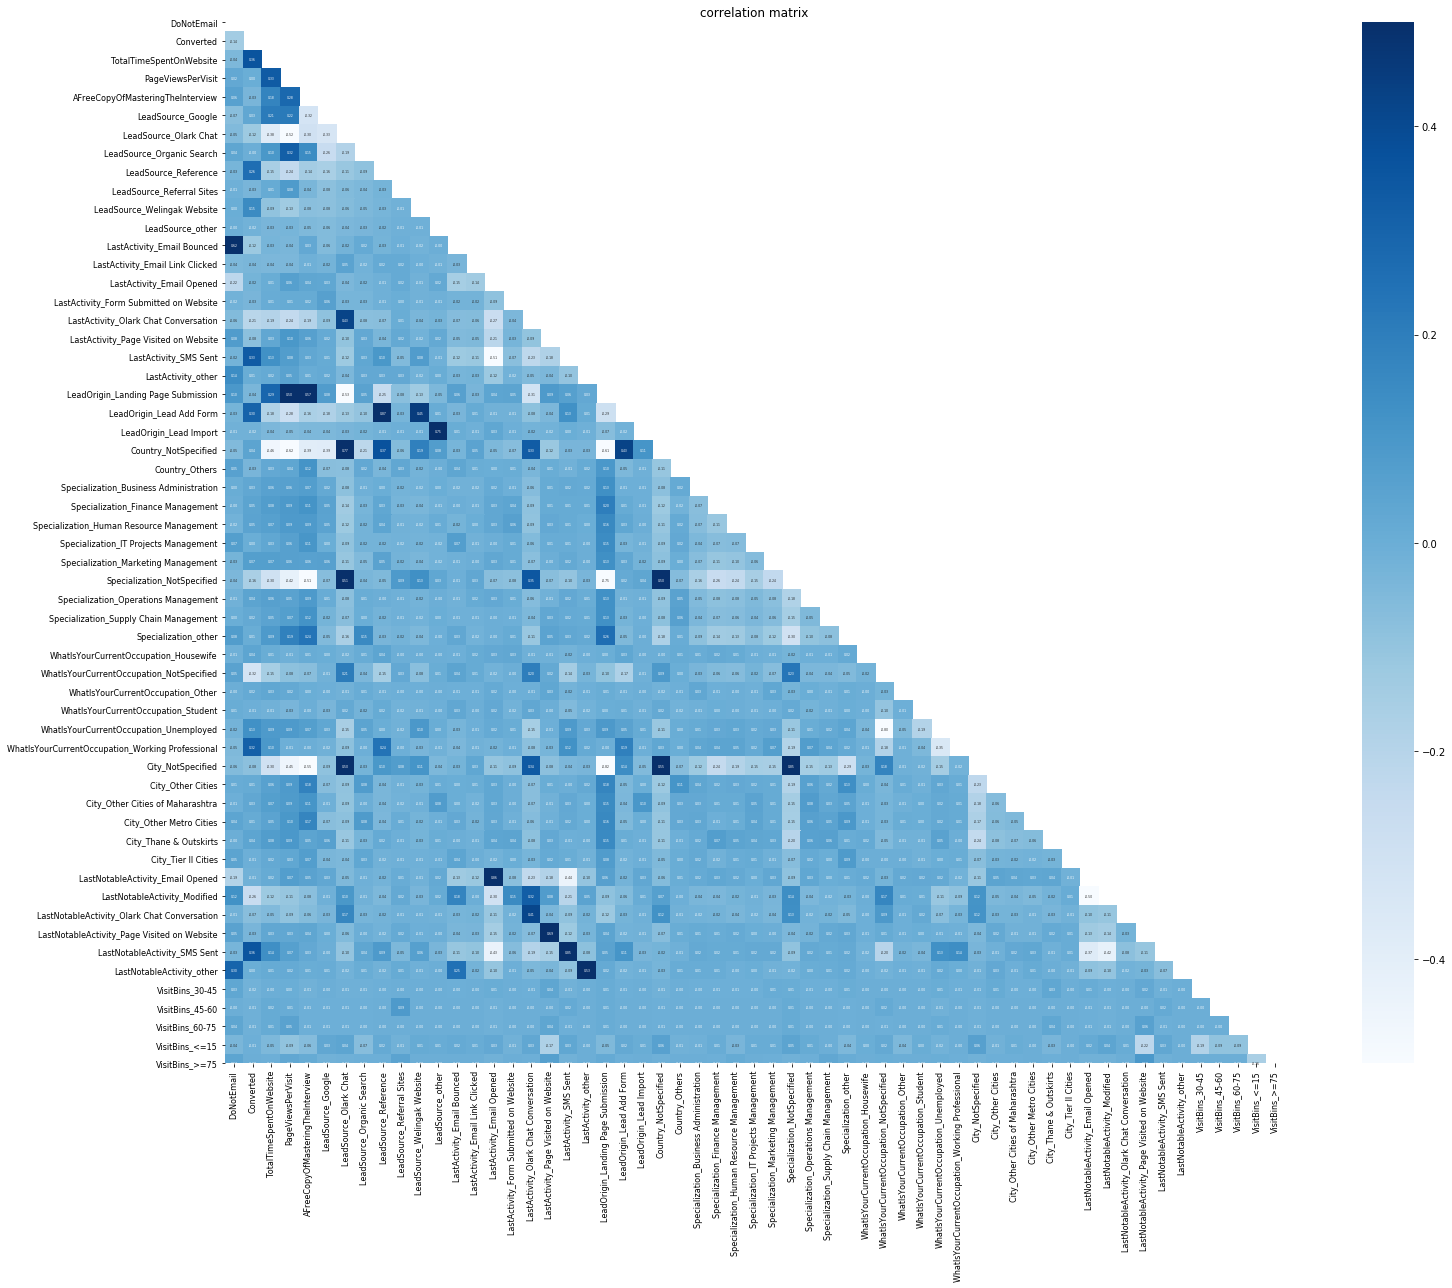

In [105]:
arr_corr = lead_corr.values
# mask out the top triangle
arr_corr[np.triu_indices_from(arr_corr)] = np.nan

fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(lead_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(lead_corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(lead_corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix')
plt.tight_layout()


#### Dropping highly correlated dummy variables

In [106]:
X_test = X_test.drop(['DoNotEmail', 'Country_NotSpecified','LastNotableActivity_Email Opened','LastNotableActivity_SMS Sent', 'City_NotSpecified', 'LeadOrigin_Landing Page Submission', 'PageViewsPerVisit', 'LeadOrigin_Lead Add Form', 'LeadSource_other', 'LastActivity_Email Bounced', 'LastNotableActivity_other', 'LastNotableActivity_Page Visited on Website', 'Specialization_NotSpecified'], 1)
X_train = X_train.drop(['DoNotEmail', 'Country_NotSpecified','LastNotableActivity_Email Opened','LastNotableActivity_SMS Sent', 'City_NotSpecified', 'LeadOrigin_Landing Page Submission', 'PageViewsPerVisit', 'LeadOrigin_Lead Add Form', 'LeadSource_other', 'LastActivity_Email Bounced', 'LastNotableActivity_other', 'LastNotableActivity_Page Visited on Website', 'Specialization_NotSpecified'], 1)

In [107]:
X_train.head()

,TotalTimeSpentOnWebsite,AFreeCopyOfMasteringTheInterview,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_other,LeadOrigin_Lead Import,Country_Others,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_other,WhatIsYourCurrentOccupation_Housewife,WhatIsYourCurrentOccupation_NotSpecified,WhatIsYourCurrentOccupation_Other,WhatIsYourCurrentOccupation_Student,WhatIsYourCurrentOccupation_Unemployed,WhatIsYourCurrentOccupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,VisitBins_30-45,VisitBins_45-60,VisitBins_60-75,VisitBins_<=15,VisitBins_>=75
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
640716,-0.849846,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
643974,-0.717335,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
611920,-0.235143,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
589390,-0.894016,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
601887,-0.894016,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

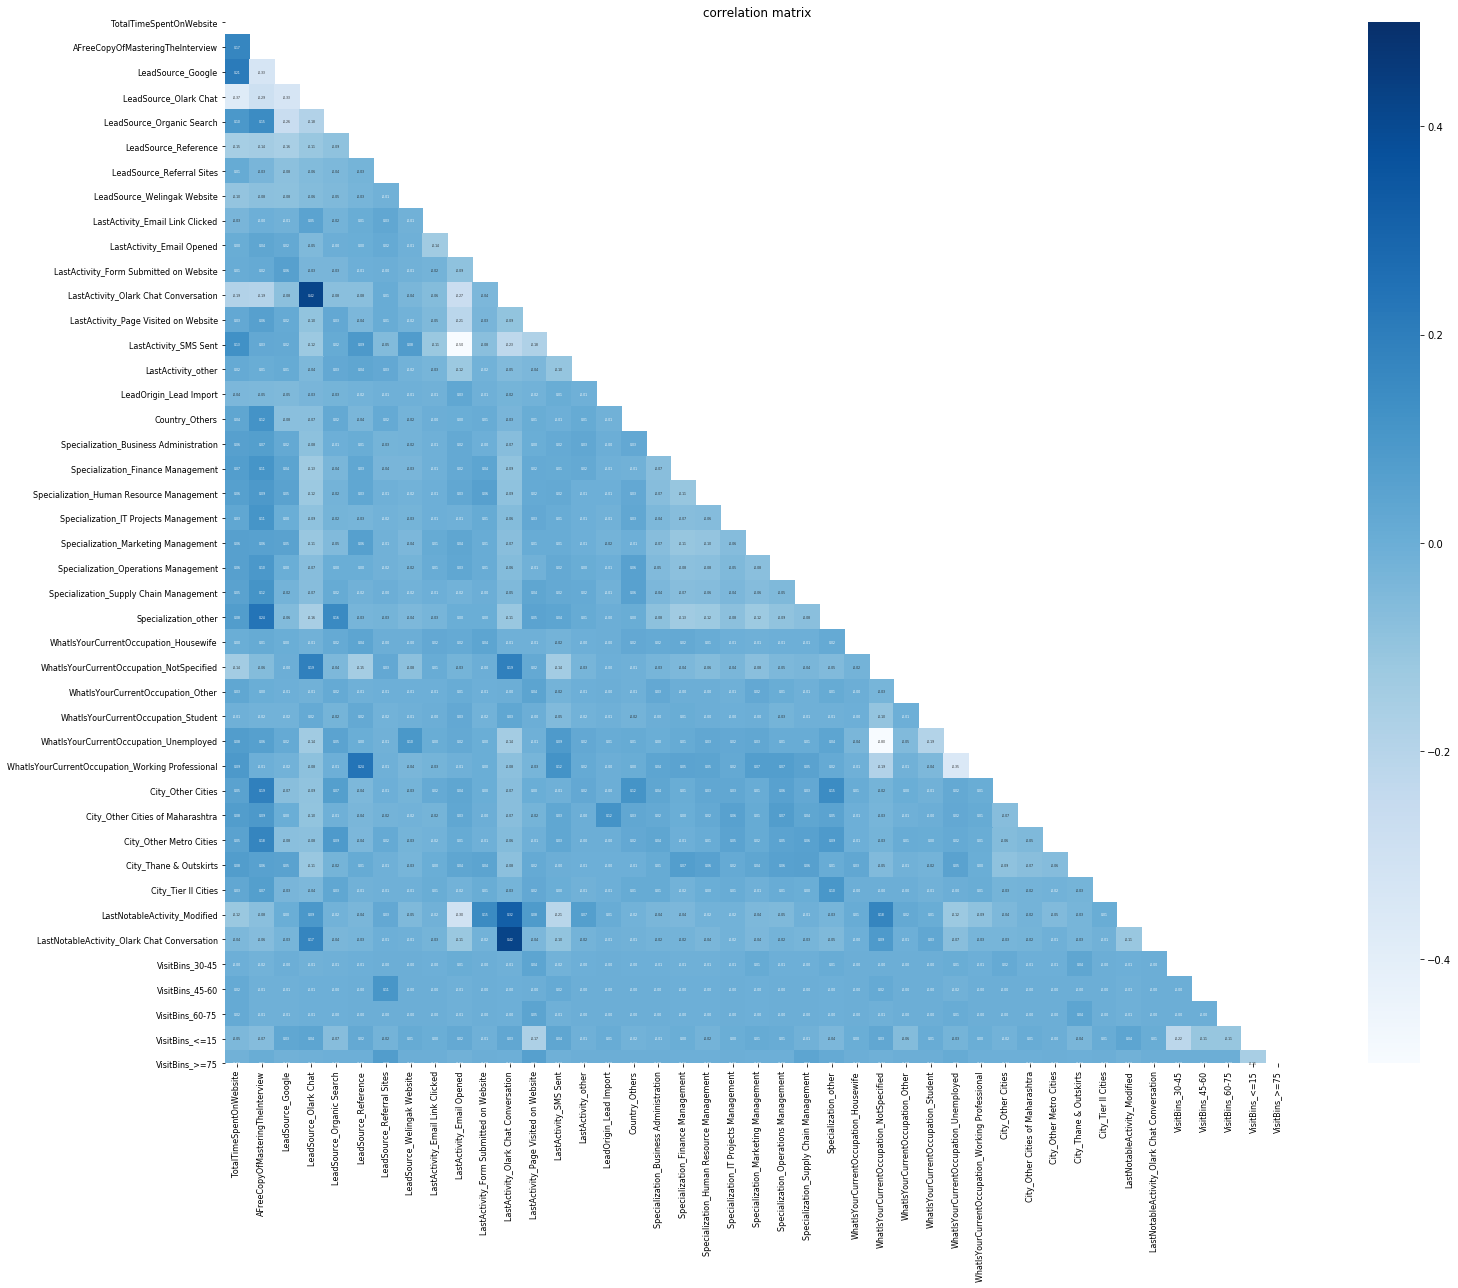

In [108]:
xtrain_corr = X_train.corr()
arr_corr = xtrain_corr.values
# mask out the top triangle
arr_corr[np.triu_indices_from(arr_corr)] = np.nan

fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(xtrain_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(xtrain_corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(xtrain_corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix')
plt.tight_layout()
# plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

### Feature Selection Using RFE

In [109]:
# using sklearn 
logreg = LogisticRegression()

In [110]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [111]:
rfe.support_

array([ True, False, False,  True, False,  True, False,  True, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True,  True,  True, False, False, False, False, False,
        True,  True, False, False, False, False,  True])

In [112]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalTimeSpentOnWebsite', True, 1),
 ('AFreeCopyOfMasteringTheInterview', False, 20),
 ('LeadSource_Google', False, 11),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 13),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 12),
 ('LeadSource_Welingak Website', True, 1),
 ('LastActivity_Email Link Clicked', False, 9),
 ('LastActivity_Email Opened', True, 1),
 ('LastActivity_Form Submitted on Website', False, 8),
 ('LastActivity_Olark Chat Conversation', False, 24),
 ('LastActivity_Page Visited on Website', False, 7),
 ('LastActivity_SMS Sent', True, 1),
 ('LastActivity_other', True, 1),
 ('LeadOrigin_Lead Import', False, 5),
 ('Country_Others', False, 2),
 ('Specialization_Business Administration', False, 21),
 ('Specialization_Finance Management', False, 17),
 ('Specialization_Human Resource Management', False, 22),
 ('Specialization_IT Projects Management', False, 19),
 ('Specialization_Marketing Management', False, 15),
 ('Specia

In [113]:
# get supported columns from RFE
col = X_train.columns[rfe.support_]

#### Assessing the model with StatsModels

In [114]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6368
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.5
Date:                Sat, 30 May 2020   Deviance:                       5210.9
Time:                        01:11:24   Pearson chi2:                 6.63e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.7077      0.609     -1.162      0.245      -1.902       0.486
TotalTimeSpentOnWebsite                              1.1326      0.040     28.125      0.000       1.054       1.212
LeadSource_Olark Chat                                1.3171      0.103     12.798      0.000       1.115       1.519
LeadSource_Reference                                 3.6974      0.230     16.096      0.000       3.247       4.148
LeadSource_Welingak Website                          5.4157      0.723      7.494      0.000       3.999       6.832
LastActivity_Email Opened                            0.5898      0.108      5.453      0.000       0.378       0.802
LastActivity_SMS Sent                                1.6704      0.110     15.225      0.000       1.455       1.885
LastActivity_other                                   1.0383      0.229      4.540      0.000       0.590       1.486
WhatIsYourCurrentOccupation_Housewife               22.4830    1.7e+04      0.001      0.999   -3.34e+04    3.34e+04
WhatIsYourCurrentOccupation_NotSpecified            -1.9258      0.607     -3.170      0.002      -3.117      -0.735
WhatIsYourCurrentOccupation_Student                 -0.7928      0.641     -1.237      0.216      -2.049       0.463
WhatIsYourCurrentOccupation_Unemployed              -0.7717      0.604     -1.277      0.202      -1.956       0.413
WhatIsYourCurrentOccupation_Working Professional     1.7138      0.628      2.728      0.006       0.483       2.945
LastNotableActivity_Modified                        -0.7748      0.090     -8.640      0.000      -0.951      -0.599
LastNotableActivity_Olark Chat Conversation         -0.8332      0.322     -2.591      0.010      -1.463      -0.203
VisitBins_>=75                                       2.2461      1.423      1.579      0.114      -0.542       5.034
====================================================================================================================
"""

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,WhatIsYourCurrentOccupation_Unemployed,5.03
4,LastActivity_Email Opened,3.21
8,WhatIsYourCurrentOccupation_NotSpecified,3.16
5,LastActivity_SMS Sent,2.80
12,LastNotableActivity_Modified,2.33
11,WhatIsYourCurrentOccupation_Working Professional,1.66
1,LeadSource_Olark Chat,1.57
0,TotalTimeSpentOnWebsite,1.29
2,LeadSource_Reference,1.22
13,LastNotableActivity_Olark Chat Conversation,1.19


In [116]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadNumber'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber
0,0,0.047142,640716
1,0,0.044502,643974
2,0,0.239402,611920
3,0,0.357748,589390
4,0,0.352912,601887


In [118]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber,predicted
0,0,0.047142,640716,0
1,0,0.044502,643974,0
2,0,0.239402,611920,0
3,0,0.357748,589390,0
4,0,0.352912,601887,0


In [119]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3532  419]
 [ 740 1677]]


In [120]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8179962311557789


## Drop WhatIsYourCurrentOccupation_Housewife as it has high p value

In [121]:
col = col.drop('WhatIsYourCurrentOccupation_Housewife', 1)

In [122]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6368
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.6
Date:                Sat, 30 May 2020   Deviance:                       5217.2
Time:                        01:11:25   Pearson chi2:                 6.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.0318      0.547     -0.058      0.954      -1.104       1.040
TotalTimeSpentOnWebsite                              1.1307      0.040     28.105      0.000       1.052       1.210
LeadSource_Olark Chat                                1.3137      0.103     12.771      0.000       1.112       1.515
LeadSource_Reference                                 3.7009      0.229     16.127      0.000       3.251       4.151
LeadSource_Welingak Website                          5.4129      0.723      7.490      0.000       3.996       6.829
LastActivity_Email Opened                            0.5933      0.108      5.491      0.000       0.382       0.805
LastActivity_SMS Sent                                1.6723      0.110     15.250      0.000       1.457       1.887
LastActivity_other                                   1.0397      0.229      4.548      0.000       0.592       1.488
WhatIsYourCurrentOccupation_NotSpecified            -2.6032      0.546     -4.766      0.000      -3.674      -1.533
WhatIsYourCurrentOccupation_Student                 -1.4709      0.583     -2.525      0.012      -2.613      -0.329
WhatIsYourCurrentOccupation_Unemployed              -1.4496      0.542     -2.673      0.008      -2.513      -0.387
WhatIsYourCurrentOccupation_Working Professional     1.0353      0.568      1.821      0.069      -0.079       2.150
LastNotableActivity_Modified                        -0.7728      0.090     -8.627      0.000      -0.948      -0.597
LastNotableActivity_Olark Chat Conversation         -0.8288      0.321     -2.579      0.010      -1.459      -0.199
VisitBins_>=75                                       2.2468      1.422      1.579      0.114      -0.541       5.035
====================================================================================================================
"""

In [123]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,WhatIsYourCurrentOccupation_Unemployed,5.00
4,LastActivity_Email Opened,3.20
7,WhatIsYourCurrentOccupation_NotSpecified,3.14
5,LastActivity_SMS Sent,2.79
11,LastNotableActivity_Modified,2.32
10,WhatIsYourCurrentOccupation_Working Professional,1.65
1,LeadSource_Olark Chat,1.57
0,TotalTimeSpentOnWebsite,1.29
2,LeadSource_Reference,1.22
12,LastNotableActivity_Olark Chat Conversation,1.19


In [124]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [125]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadNumber'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber
0,0,0.047307,640716
1,0,0.044560,643974
2,0,0.239755,611920
3,0,0.357709,589390
4,0,0.352842,601887


In [126]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber,predicted
0,0,0.047307,640716,0
1,0,0.044560,643974,0
2,0,0.239755,611920,0
3,0,0.357709,589390,0
4,0,0.352842,601887,0


In [127]:
# # Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3532  419]
 [ 740 1677]]


In [128]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8179962311557789


## Drop 'VisitBins_>=75' as it has high p value

In [129]:
col = col.drop('VisitBins_>=75', 1)

In [130]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6368
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.6
Date:                Sat, 30 May 2020   Deviance:                       5219.3
Time:                        01:11:26   Pearson chi2:                 6.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.0248      0.547     -0.045      0.964      -1.096       1.047
TotalTimeSpentOnWebsite                              1.1292      0.040     28.090      0.000       1.050       1.208
LeadSource_Olark Chat                                1.3103      0.103     12.747      0.000       1.109       1.512
LeadSource_Reference                                 3.6986      0.229     16.118      0.000       3.249       4.148
LeadSource_Welingak Website                          5.4101      0.723      7.487      0.000       3.994       6.826
LastActivity_Email Opened                            0.5856      0.108      5.429      0.000       0.374       0.797
LastActivity_SMS Sent                                1.6644      0.109     15.204      0.000       1.450       1.879
LastActivity_other                                   1.0330      0.229      4.521      0.000       0.585       1.481
WhatIsYourCurrentOccupation_NotSpecified            -2.6014      0.546     -4.765      0.000      -3.671      -1.531
WhatIsYourCurrentOccupation_Student                 -1.4700      0.582     -2.524      0.012      -2.611      -0.329
WhatIsYourCurrentOccupation_Unemployed              -1.4471      0.542     -2.670      0.008      -2.510      -0.385
WhatIsYourCurrentOccupation_Working Professional     1.0356      0.568      1.823      0.068      -0.078       2.149
LastNotableActivity_Modified                        -0.7768      0.090     -8.677      0.000      -0.952      -0.601
LastNotableActivity_Olark Chat Conversation         -0.8354      0.321     -2.600      0.009      -1.465      -0.206
====================================================================================================================
"""

In [131]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,WhatIsYourCurrentOccupation_Unemployed,4.99
4,LastActivity_Email Opened,3.19
7,WhatIsYourCurrentOccupation_NotSpecified,3.14
5,LastActivity_SMS Sent,2.78
11,LastNotableActivity_Modified,2.32
10,WhatIsYourCurrentOccupation_Working Professional,1.65
1,LeadSource_Olark Chat,1.57
0,TotalTimeSpentOnWebsite,1.29
2,LeadSource_Reference,1.22
12,LastNotableActivity_Olark Chat Conversation,1.19


In [132]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [133]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadNumber'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber
0,0,0.047415,640716
1,0,0.044841,643974
2,0,0.240151,611920
3,0,0.357664,589390
4,0,0.352441,601887


In [134]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber,predicted
0,0,0.047415,640716,0
1,0,0.044841,643974,0
2,0,0.240151,611920,0
3,0,0.357664,589390,0
4,0,0.352441,601887,0


In [135]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3533  418]
 [ 741 1676]]
0.8179962311557789


## Drop 'WhatIsYourCurrentOccupation_Working Professional' as it has high p value

In [136]:
col = col.drop('WhatIsYourCurrentOccupation_Working Professional', 1)

In [137]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6368
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.2
Date:                Sat, 30 May 2020   Deviance:                       5222.4
Time:                        01:11:27   Pearson chi2:                 6.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.9193      0.190      4.843      0.000       0.547       1.291
TotalTimeSpentOnWebsite                         1.1287      0.040     28.080      0.000       1.050       1.208
LeadSource_Olark Chat                           1.3115      0.103     12.761      0.000       1.110       1.513
LeadSource_Reference                            3.7002      0.229     16.127      0.000       3.250       4.150
LeadSource_Welingak Website                     5.4096      0.723      7.486      0.000       3.993       6.826
LastActivity_Email Opened                       0.5891      0.108      5.460      0.000       0.378       0.801
LastActivity_SMS Sent                           1.6703      0.109     15.264      0.000       1.456       1.885
LastActivity_other                              1.0408      0.228      4.560      0.000       0.593       1.488
WhatIsYourCurrentOccupation_NotSpecified       -3.5486      0.185    -19.198      0.000      -3.911      -3.186
WhatIsYourCurrentOccupation_Student            -2.4167      0.275     -8.798      0.000      -2.955      -1.878
WhatIsYourCurrentOccupation_Unemployed         -2.3946      0.172    -13.895      0.000      -2.732      -2.057
LastNotableActivity_Modified                   -0.7794      0.090     -8.707      0.000      -0.955      -0.604
LastNotableActivity_Olark Chat Conversation    -0.8300      0.321     -2.588      0.010      -1.459      -0.201
===============================================================================================================
"""

In [138]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,WhatIsYourCurrentOccupation_Unemployed,3.60
7,WhatIsYourCurrentOccupation_NotSpecified,2.52
4,LastActivity_Email Opened,2.42
5,LastActivity_SMS Sent,2.08
10,LastNotableActivity_Modified,1.99
1,LeadSource_Olark Chat,1.54
0,TotalTimeSpentOnWebsite,1.27
2,LeadSource_Reference,1.16
11,LastNotableActivity_Olark Chat Conversation,1.15
8,WhatIsYourCurrentOccupation_Student,1.10


In [139]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [140]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadNumber'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber
0,0,0.047451,640716
1,0,0.044598,643974
2,0,0.240186,611920
3,0,0.358054,589390
4,0,0.352991,601887


In [141]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber,predicted
0,0,0.047451,640716,0
1,0,0.044598,643974,0
2,0,0.240186,611920,0
3,0,0.358054,589390,0
4,0,0.352991,601887,0


In [142]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3531  420]
 [ 741 1676]]
0.8176821608040201


## Drop 'LastNotableActivity_Olark Chat Conversation' as it has high p value

In [143]:
col = col.drop('LastNotableActivity_Olark Chat Conversation', 1)

In [144]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6368
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.9
Date:                Sat, 30 May 2020   Deviance:                       5229.8
Time:                        01:11:28   Pearson chi2:                 6.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.8395      0.188      4.474      0.000       0.472       1.207
TotalTimeSpentOnWebsite                      1.1234      0.040     27.987      0.000       1.045       1.202
LeadSource_Olark Chat                        1.2807      0.102     12.530      0.000       1.080       1.481
LeadSource_Reference                         3.6856      0.229     16.075      0.000       3.236       4.135
LeadSource_Welingak Website                  5.3701      0.721      7.445      0.000       3.956       6.784
LastActivity_Email Opened                    0.6761      0.103      6.539      0.000       0.473       0.879
LastActivity_SMS Sent                        1.7528      0.106     16.610      0.000       1.546       1.960
LastActivity_other                           1.1041      0.227      4.863      0.000       0.659       1.549
WhatIsYourCurrentOccupation_NotSpecified    -3.5658      0.185    -19.279      0.000      -3.928      -3.203
WhatIsYourCurrentOccupation_Student         -2.4397      0.275     -8.878      0.000      -2.978      -1.901
WhatIsYourCurrentOccupation_Unemployed      -2.3993      0.173    -13.904      0.000      -2.737      -2.061
LastNotableActivity_Modified                -0.7262      0.087     -8.329      0.000      -0.897      -0.555
============================================================================================================
"""

In [145]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,WhatIsYourCurrentOccupation_Unemployed,3.40
7,WhatIsYourCurrentOccupation_NotSpecified,2.35
4,LastActivity_Email Opened,2.29
5,LastActivity_SMS Sent,2.00
10,LastNotableActivity_Modified,1.89
1,LeadSource_Olark Chat,1.49
0,TotalTimeSpentOnWebsite,1.26
2,LeadSource_Reference,1.16
8,WhatIsYourCurrentOccupation_Student,1.09
6,LastActivity_other,1.07


In [146]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [147]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadNumber'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber
0,0,0.047205,640716
1,0,0.043446,643974
2,0,0.240879,611920
3,0,0.352660,589390
4,0,0.343490,601887


In [148]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber,predicted
0,0,0.047205,640716,0
1,0,0.043446,643974,0
2,0,0.240879,611920,0
3,0,0.352660,589390,0
4,0,0.343490,601887,0


In [149]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3530  421]
 [ 739 1678]]
0.8178391959798995


## Drop 'WhatIsYourCurrentOccupation_Unemployed	' as it has high VIF

In [150]:
col = col.drop('WhatIsYourCurrentOccupation_Unemployed', 1)

In [151]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6368
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2750.0
Date:                Sat, 30 May 2020   Deviance:                       5499.9
Time:                        01:11:28   Pearson chi2:                 6.37e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3381      0.098    -13.697      0.000      -1.530      -1.147
TotalTimeSpentOnWebsite                      1.1395      0.039     28.955      0.000       1.062       1.217
LeadSource_Olark Chat                        1.2401      0.100     12.449      0.000       1.045       1.435
LeadSource_Reference                         3.9180      0.223     17.563      0.000       3.481       4.355
LeadSource_Welingak Website                  5.1765      0.721      7.181      0.000       3.764       6.589
LastActivity_Email Opened                    0.6659      0.100      6.658      0.000       0.470       0.862
LastActivity_SMS Sent                        1.7233      0.102     16.851      0.000       1.523       1.924
LastActivity_other                           1.0513      0.219      4.792      0.000       0.621       1.481
WhatIsYourCurrentOccupation_NotSpecified    -1.3697      0.086    -15.871      0.000      -1.539      -1.201
WhatIsYourCurrentOccupation_Student         -0.2593      0.223     -1.162      0.245      -0.697       0.178
LastNotableActivity_Modified                -0.7140      0.085     -8.445      0.000      -0.880      -0.548
============================================================================================================
"""

In [152]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,WhatIsYourCurrentOccupation_NotSpecified,1.49
1,LeadSource_Olark Chat,1.43
9,LastNotableActivity_Modified,1.35
0,TotalTimeSpentOnWebsite,1.26
4,LastActivity_Email Opened,1.22
5,LastActivity_SMS Sent,1.21
2,LeadSource_Reference,1.15
3,LeadSource_Welingak Website,1.05
6,LastActivity_other,1.03
8,WhatIsYourCurrentOccupation_Student,1.03


In [153]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [154]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadNumber'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber
0,0,0.046963,640716
1,0,0.053683,643974
2,0,0.280871,611920
3,0,0.389160,589390
4,0,0.329562,601887


In [155]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber,predicted
0,0,0.046963,640716,0
1,0,0.053683,643974,0
2,0,0.280871,611920,0
3,0,0.389160,589390,0
4,0,0.329562,601887,0


In [156]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3482  469]
 [ 795 1622]]
0.8015075376884422


## Drop 'WhatIsYourCurrentOccupation_Student	' as it has high p value

In [157]:
col = col.drop('WhatIsYourCurrentOccupation_Student', 1)

In [158]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6368
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2750.6
Date:                Sat, 30 May 2020   Deviance:                       5501.3
Time:                        01:11:29   Pearson chi2:                 6.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3483      0.097    -13.856      0.000      -1.539      -1.158
TotalTimeSpentOnWebsite                      1.1393      0.039     28.953      0.000       1.062       1.216
LeadSource_Olark Chat                        1.2365      0.099     12.428      0.000       1.042       1.432
LeadSource_Reference                         3.9130      0.223     17.546      0.000       3.476       4.350
LeadSource_Welingak Website                  5.1818      0.721      7.188      0.000       3.769       6.595
LastActivity_Email Opened                    0.6673      0.100      6.675      0.000       0.471       0.863
LastActivity_SMS Sent                        1.7300      0.102     16.941      0.000       1.530       1.930
LastActivity_other                           1.0591      0.219      4.833      0.000       0.630       1.489
WhatIsYourCurrentOccupation_NotSpecified    -1.3617      0.086    -15.824      0.000      -1.530      -1.193
LastNotableActivity_Modified                -0.7138      0.085     -8.446      0.000      -0.879      -0.548
============================================================================================================
"""

In [159]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,WhatIsYourCurrentOccupation_NotSpecified,1.48
1,LeadSource_Olark Chat,1.43
8,LastNotableActivity_Modified,1.34
0,TotalTimeSpentOnWebsite,1.26
4,LastActivity_Email Opened,1.21
5,LastActivity_SMS Sent,1.21
2,LeadSource_Reference,1.15
3,LeadSource_Welingak Website,1.05
6,LastActivity_other,1.03


In [160]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [161]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadNumber'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber
0,0,0.046932,640716
1,0,0.053186,643974
2,0,0.279100,611920
3,0,0.386258,589390
4,0,0.386258,601887


In [162]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber,predicted
0,0,0.046932,640716,0
1,0,0.053186,643974,0
2,0,0.279100,611920,0
3,0,0.386258,589390,0
4,0,0.386258,601887,0


In [163]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3481  470]
 [ 794 1623]]
0.8015075376884422


### Plotting the ROC Curve

In [164]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [165]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

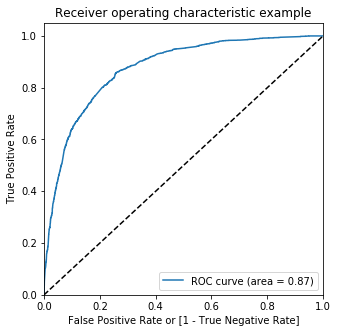

In [166]:
draw_roc( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [167]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.046932,640716,0,1,0,0,0,0,0,0,0,0,0
1,0,0.053186,643974,0,1,0,0,0,0,0,0,0,0,0
2,0,0.279100,611920,0,1,1,1,0,0,0,0,0,0,0
3,0,0.386258,589390,0,1,1,1,1,0,0,0,0,0,0
4,0,0.386258,601887,0,1,1,1,1,0,0,0,0,0,0


In [168]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [float(x)/10 for x in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379554  1.000000  0.000000
0.1   0.1  0.616520  0.972280  0.398886
0.2   0.2  0.733040  0.918494  0.619590
0.3   0.3  0.781878  0.861812  0.732979
0.4   0.4  0.799780  0.757964  0.825361
0.5   0.5  0.801508  0.671494  0.881043
0.6   0.6  0.795697  0.598262  0.916477
0.7   0.7  0.764290  0.468763  0.945077
0.8   0.8  0.739479  0.371949  0.964313
0.9   0.9  0.695352  0.223417  0.984055


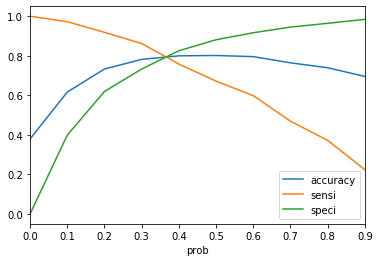

In [169]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(cutoff_df.prob)
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.


In [170]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.046932,640716,0,1,0,0,0,0,0,0,0,0,0
1,0,0.053186,643974,0,1,0,0,0,0,0,0,0,0,0
2,0,0.279100,611920,0,1,1,1,0,0,0,0,0,0,0
3,0,0.386258,589390,1,1,1,1,1,0,0,0,0,0,0
4,0,0.386258,601887,1,1,1,1,1,0,0,0,0,0,0


## Model evaluation

#### Accuracy

In [171]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7883165829145728

#### confustion matrix

In [172]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion2

array([[3028,  923],
       [ 425, 1992]])

In [173]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity

In [174]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8241621845262722

#### Specificity

In [175]:
# Let us calculate specificity
TN / float(TN+FP)

0.7663882561376867

#### false postive rate

In [176]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23361174386231334


#### Positive predictive value 

In [177]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6833619210977702


#### Negative predictive value

In [178]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8769186214885607


### Precision and Recall

In [179]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6833619210977702

In [180]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8241621845262722

### Precision and recall tradeoff

In [181]:
from sklearn.metrics import precision_recall_curve

In [182]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

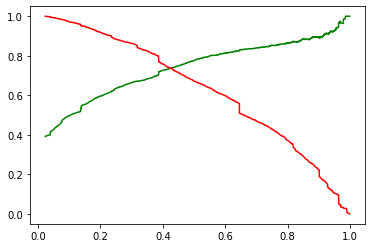

In [183]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [184]:
X_test[['TotalTimeSpentOnWebsite']] = scaler.fit_transform(X_test[['TotalTimeSpentOnWebsite']])
X_test = X_test[col]
X_test.head()

,TotalTimeSpentOnWebsite,LeadSource_Olark Chat,LeadSource_Reference,LeadSource_Welingak Website,LastActivity_Email Opened,LastActivity_SMS Sent,LastActivity_other,WhatIsYourCurrentOccupation_NotSpecified,LastNotableActivity_Modified
Lead Number,,,,,,,,,
633182,-0.766897,0,0,0,1,0,0,1,0
621252,-0.081974,0,0,0,0,0,0,0,0
583666,-0.870454,1,0,0,0,0,0,1,1
647517,0.116055,0,0,0,1,0,0,1,0
587218,-0.870454,1,0,0,0,1,0,1,1


In [185]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm).values.reshape(-1)

y_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_pred_final['LeadNumber'] = y_test.index


In [186]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Converted_Prob,LeadNumber,final_predicted
0,0,0.051345,633182,0
1,0,0.191286,621252,0
2,0,0.039966,583666,0
3,1,0.128923,647517,0
4,0,0.190162,587218,0


In [187]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7948717948717948

In [188]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1305,  391],
       [ 169,  865]])

In [189]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [190]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8365570599613152

In [191]:
# Let us calculate specificity
TN / float(TN+FP)

0.7694575471698113

In [192]:
# f1 score